In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import torch
import torch.nn.functional as F
import numpy as np
from torch.nn.parameter import Parameter
import matplotlib.pyplot as plt
from time import time
import scipy.io as sio
import tables
import os
from torch import autograd
from time import time
from collections import Counter
import math
import timeit
import os
import struct
import glob
import re
from scipy.fftpack import fft
import seaborn as sns
import pandas as pd
import sys
import scipy
import pickle
import tracemalloc
from scipy import signal
from copy import deepcopy
from pytorch_memlab import MemReporter
import pyldpc
from sklearn import datasets
import bisect
import torch
from utils.loss import DECOLLELoss, one_hot_crossentropy
from model.LIF_MLP import LIFMLP
from tqdm import tqdm
from optimizer.BBSNN import BayesBiSNNRP
from copy import deepcopy
import os
import argparse
import numpy as np
from data_preprocessing.load_data import get_batch_example
from collections import Counter
import pickle
import fnmatch
import time
from utils.misc import make_moon_dataset_bin, make_moon_dataset_bin_pop_coding, make_moon_test_dataset_bin_pop_coding
from sklearn.manifold import TSNE

(array([1314.,  764.,  631.,  497.,  402.,  304.,  282.,  296.,  281.,
         605.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

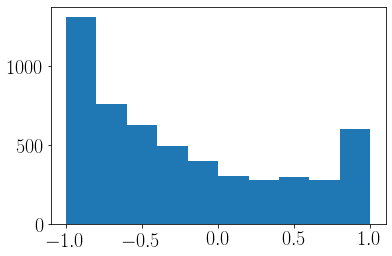

In [5]:
res = r"C:\Users\K1804053\results\009__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.250000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
plt.hist(torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy())

(array([ 606.,  277.,  309.,  337.,  345.,  384.,  494.,  608.,  737.,
        1279.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

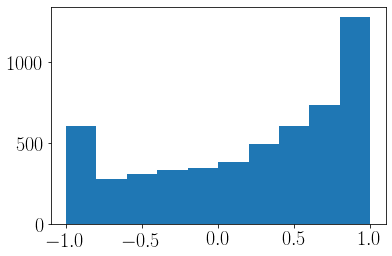

In [16]:
res = r"C:\Users\K1804053\results\010__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.750000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
plt.hist(torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy())

(array([ 744.,  460.,  446.,  413.,  443.,  416.,  484.,  440.,  511.,
        1019.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

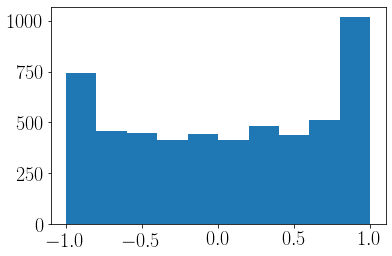

In [18]:
res = r"C:\Users\K1804053\results\001__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.500000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))

plt.hist(torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy())

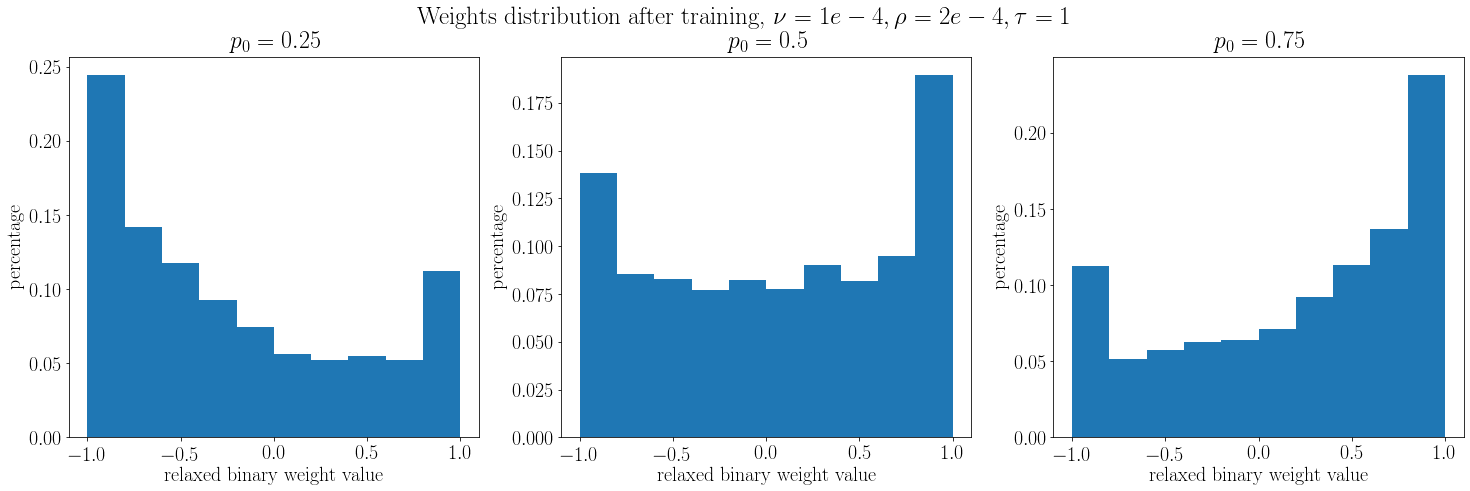

In [21]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(1, 3, figsize=(25,7))



res = r"C:\Users\K1804053\results\009__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.250000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
weights = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy()
axs[0].hist(weights, weights=np.ones(len(weights)) / len(weights))
axs[0].set_xlabel(r'relaxed binary weight value')
axs[0].set_ylabel(r'percentage')
axs[0].set_title(r'$p_0=0.25$')




res = r"C:\Users\K1804053\results\001__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.500000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
weights = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy()
axs[1].hist(weights, weights=np.ones(len(weights)) / len(weights))
axs[1].set_xlabel(r'relaxed binary weight value')
axs[1].set_ylabel(r'percentage')
axs[1].set_title(r'$p_0=0.5$')


res = r"C:\Users\K1804053\results\010__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.750000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/binary_model_weights.pt'))
weights = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad]).numpy()
axs[2].hist(weights, weights=np.ones(len(weights)) / len(weights))
axs[2].set_xlabel(r'relaxed binary weight value')
axs[2].set_ylabel(r'percentage')

axs[2].set_title(r'$p_0=0.75$')


fig.suptitle(r'Weights distribution after training, $\nu=1e-4, \rho=2e-4, \tau=1$', fontsize=25)
plt.savefig(r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN\weights_distribution.pdf", format='pdf', dpi=1000)

(array([0.16331845, 0.00837054, 0.00520833, 0.01227679, 0.02064732,
        0.01953125, 0.03106399, 0.54315476, 0.01655506, 0.17987351]),
 array([1.0322154e-25, 1.0000000e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

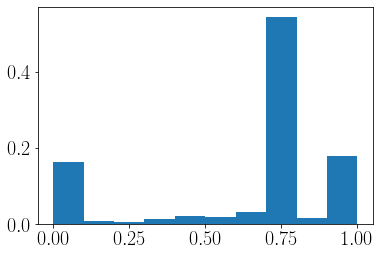

In [15]:
res = r"C:\Users\K1804053\results\009__29-10-2020_mnist_dvs_bbsnnrp_3000_epochs_temp_1.000000_prior_0.250000"

binary_model = LIFMLP([20],
                      2,
                      n_neurons=[64, 64],
                      with_output_layer=False,
                      with_bias=False,
                      )
binary_model.load_state_dict(torch.load(res + '/latent_model_weights.pt'))

test = torch.cat([w.data.flatten() for w in binary_model.parameters() if w.requires_grad])
test = torch.pow(2 * test, 10) / (1 + torch.pow(2 * test, 10))
plt.hist(test, weights=np.ones(len(test)) / len(test))


In [41]:
from sklearn.manifold import TSNE
from data_preprocessing.load_data import get_batch_example

In [34]:
dataset = tables.open_file(r"C:\Users\K1804053\OneDrive - King's College London\PycharmProjects\datasets\mnist-dvs\mnist_dvs_events.hdf5")
test_data = dataset.root.test
train_data = dataset.root.train

batch_size = 32

dt = 25000  # us
sample_length = 2000  # length of samples during training in ms
T = int(sample_length * 1000 / dt)  # number of timesteps in a sample
input_size = [2 * (dataset.root.stats.train_data[1] ** 2)]
n_classes = dataset.root.stats.test_data[1]
n_samples = dataset.root.stats.train_data[0]

n_batchs = n_samples // batch_size + (1 - (n_samples % batch_size == 0))
idx_avail = np.arange(n_samples)
idxs_used = []

inputs_ = torch.Tensor()
labels_ = torch.Tensor()

for i in range(n_batchs):
    if (i == (n_batchs - 1)) & (n_samples % batch_size != 0):
        batch_size_curr = n_samples % batch_size
    else:
        batch_size_curr = batch_size

    idxs = np.random.choice(idx_avail, [batch_size_curr], replace=False)
    idxs_used += list(idxs)
    idx_avail = [j for j in idx_avail if j not in idxs_used]

    inputs, labels = get_batch_example(train_data, idxs, batch_size_curr, T, n_classes, input_size, dt, dataset.root.stats.train_data[1], True)
    
    inputs_ = torch.cat((inputs_, torch.sum(inputs, dim=1)/T))
    labels_ = torch.cat((labels_, torch.argmax(torch.sum(labels, dim=-1)/T, dim=-1)))
#     inputs_ = torch.cat((inputs_, inputs.type(torch.bool)))


KeyboardInterrupt: 

In [35]:
inputs_ = inputs_.numpy().reshape([inputs_.shape[0], -1])
inputs_.shape

(7168, 540800)

In [51]:
tsne = TSNE()
test = np.empty([0, 2])
for i in range(int(inputs_.shape[0] / batch_size)):
    test = np.vstack((test, tsne.fit_transform(inputs_[i * batch_size : (i + 1) * batch_size], labels_[i * batch_size : (i + 1) * batch_size])))

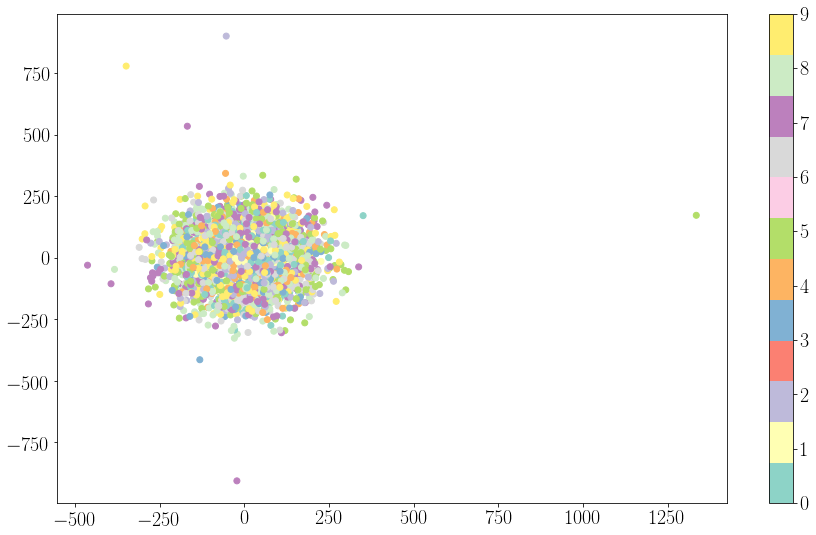

In [57]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(1, 1, figsize=(15,9))

scat = axs.scatter(test[:, 0], test[:, 1], c=labels_[:7168], cmap='Set3')
fig.colorbar(scat, ax=axs)

# axs.set_title('T-SNE representation of the MNIST-DVS dataset')
# plt.savefig(r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN\tsne_mnistdvs.pdf", format='pdf', dpi=1000)

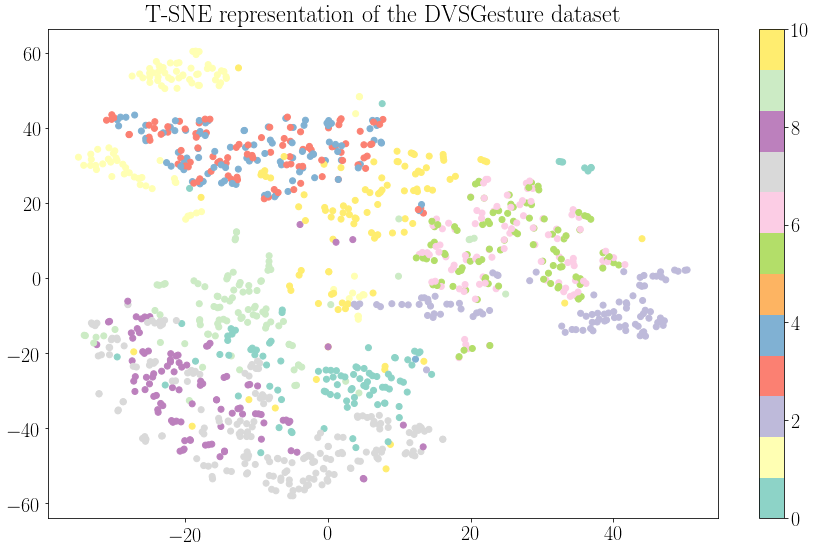

In [13]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=20)

fig, axs = plt.subplots(1, 1, figsize=(15,9))

scat = axs.scatter(test[:, 0], test[:, 1], c=labels_, cmap='Set3')
fig.colorbar(scat, ax=axs)

axs.set_title('T-SNE representation of the DVSGesture dataset')
plt.savefig(r"C:\Users\K1804053\OneDrive - King's College London\PhD\BayesBiSNN\tsne_dvsgesture.pdf", format='pdf', dpi=1000)